In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 10 minutes to pandas
[参考](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#missing-data)

## series

### from ndarray

In [2]:
pd.Series(np.random.randn(5))

0   -1.217704
1   -1.247670
2   -0.205857
3   -0.598507
4   -1.369469
dtype: float64

In [3]:
s = pd.Series(np.random.randn(5), index=['a','b','c','d','e'])
s

a   -1.015664
b   -0.289268
c    0.465263
d    1.108282
e    0.010656
dtype: float64

In [4]:
s[0]

-1.0156643030411747

In [5]:
s[:3]

a   -1.015664
b   -0.289268
c    0.465263
dtype: float64

In [6]:
s[s>0]

c    0.465263
d    1.108282
e    0.010656
dtype: float64

In [7]:
s[[4,2,1]]

e    0.010656
c    0.465263
b   -0.289268
dtype: float64

In [8]:
np.exp(s)

a    0.362162
b    0.748811
c    1.592432
d    3.029150
e    1.010713
dtype: float64

In [9]:
s.dtype

dtype('float64')

In [10]:
s.to_numpy()

array([-1.0156643 , -0.28926848,  0.46526262,  1.10828212,  0.01065591])

In [11]:
s.to_dict()

{'a': -1.0156643030411747,
 'b': -0.2892684835141707,
 'c': 0.4652626237614728,
 'd': 1.1082821229038213,
 'e': 0.010655907407660746}

In [12]:
s['a'] == s[0]

True

In [13]:
s[2] = 12
s

a    -1.015664
b    -0.289268
c    12.000000
d     1.108282
e     0.010656
dtype: float64

In [14]:
'a' in s

True

In [15]:
s.get('f','none')

'none'

### vectorized operations and label alignment with Series

In [16]:
s + s

a    -2.031329
b    -0.578537
c    24.000000
d     2.216564
e     0.021312
dtype: float64

In [17]:
s * 2

a    -2.031329
b    -0.578537
c    24.000000
d     2.216564
e     0.021312
dtype: float64

In [18]:
abs(s)

a     1.015664
b     0.289268
c    12.000000
d     1.108282
e     0.010656
dtype: float64

> The result of an operation between unaligned Series will have the union of the indexes involved. If a label is not found in one Series or the other, the result will be marked as missing NaN

In [19]:
s[1:] + s[:-1]

a          NaN
b    -0.578537
c    24.000000
d     2.216564
e          NaN
dtype: float64

### from dict

In [20]:
pd.Series({'a':0, 'b':1, 'c':2}, dtype=float)

a    0.0
b    1.0
c    2.0
dtype: float64

In [21]:
pd.Series({'a':0, 'b':1, 'c':2}, index=list('abcd'),dtype=float)

a    0.0
b    1.0
c    2.0
d    NaN
dtype: float64

### from scalar value

In [22]:
pd.Series(list(range(5)), index=list('abcde'))

a    0
b    1
c    2
d    3
e    4
dtype: int64

## DataFrame 

In [23]:
dates = pd.date_range('20190815', periods=6, freq='5h')
dates

DatetimeIndex(['2019-08-15 00:00:00', '2019-08-15 05:00:00',
               '2019-08-15 10:00:00', '2019-08-15 15:00:00',
               '2019-08-15 20:00:00', '2019-08-16 01:00:00'],
              dtype='datetime64[ns]', freq='5H')

In [24]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2019-08-15 00:00:00,1.895371,0.690688,-1.059889,2.101796
2019-08-15 05:00:00,-0.625098,-1.248365,-0.029373,1.011937
2019-08-15 10:00:00,0.549361,0.886143,0.075019,1.044665
2019-08-15 15:00:00,1.645027,0.027756,0.665225,-0.022415
2019-08-15 20:00:00,0.633535,-1.999516,-0.310198,-0.136117
2019-08-16 01:00:00,1.826572,0.659380,1.079918,-0.319106


In [25]:
df2 = pd.DataFrame({'A':1., 
              'B':pd.Timestamp('20190815'), 
              'C':pd.Series(1, index=list(range(4)),dtype='float32'),
              'D':np.array([3]*4, dtype='int32'),
              'E':pd.Categorical(['test','train', 'test', 'train']),
              'F':'foo'})
df2

,A,B,C,D,E,F
0,1.0,2019-08-15,1.0,3,test,foo
1,1.0,2019-08-15,1.0,3,train,foo
2,1.0,2019-08-15,1.0,3,test,foo
3,1.0,2019-08-15,1.0,3,train,foo


# viewing data

In [26]:
df.head()

,A,B,C,D
2019-08-15 00:00:00,1.895371,0.690688,-1.059889,2.101796
2019-08-15 05:00:00,-0.625098,-1.248365,-0.029373,1.011937
2019-08-15 10:00:00,0.549361,0.886143,0.075019,1.044665
2019-08-15 15:00:00,1.645027,0.027756,0.665225,-0.022415
2019-08-15 20:00:00,0.633535,-1.999516,-0.310198,-0.136117


In [27]:
df.tail(3)

,A,B,C,D
2019-08-15 15:00:00,1.645027,0.027756,0.665225,-0.022415
2019-08-15 20:00:00,0.633535,-1.999516,-0.310198,-0.136117
2019-08-16 01:00:00,1.826572,0.659380,1.079918,-0.319106


In [28]:
df.index

DatetimeIndex(['2019-08-15 00:00:00', '2019-08-15 05:00:00',
               '2019-08-15 10:00:00', '2019-08-15 15:00:00',
               '2019-08-15 20:00:00', '2019-08-16 01:00:00'],
              dtype='datetime64[ns]', freq='5H')

In [29]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [30]:
df.to_numpy()

array([[ 1.89537115,  0.69068812, -1.05988912,  2.10179567],
       [-0.62509827, -1.2483649 , -0.02937265,  1.01193688],
       [ 0.54936102,  0.88614273,  0.07501938,  1.04466504],
       [ 1.64502728,  0.02775625,  0.66522451, -0.02241518],
       [ 0.63353514, -1.99951611, -0.31019796, -0.13611659],
       [ 1.8265717 ,  0.65938046,  1.07991813, -0.31910568]])

In [31]:
df2.to_numpy()

array([[1.0, Timestamp('2019-08-15 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2019-08-15 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2019-08-15 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2019-08-15 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [32]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.987461,-0.163986,0.070117,0.613460
std,0.987759,1.191049,0.749043,0.937630
min,-0.625098,-1.999516,-1.059889,-0.319106
25%,0.570405,-0.929335,-0.239992,-0.107691
50%,1.139281,0.343568,0.022823,0.494761
75%,1.781186,0.682861,0.517673,1.036483
max,1.895371,0.886143,1.079918,2.101796


In [33]:
df.T

,2019-08-15 00:00:00,2019-08-15 05:00:00,2019-08-15 10:00:00,2019-08-15 15:00:00,2019-08-15 20:00:00,2019-08-16 01:00:00
A,1.895371,-0.625098,0.549361,1.645027,0.633535,1.826572
B,0.690688,-1.248365,0.886143,0.027756,-1.999516,0.659380
C,-1.059889,-0.029373,0.075019,0.665225,-0.310198,1.079918
D,2.101796,1.011937,1.044665,-0.022415,-0.136117,-0.319106


> sort by index, default axis=0 for index, 1 for column

In [34]:
df.sort_index(axis=1, ascending=0)

,D,C,B,A
2019-08-15 00:00:00,2.101796,-1.059889,0.690688,1.895371
2019-08-15 05:00:00,1.011937,-0.029373,-1.248365,-0.625098
2019-08-15 10:00:00,1.044665,0.075019,0.886143,0.549361
2019-08-15 15:00:00,-0.022415,0.665225,0.027756,1.645027
2019-08-15 20:00:00,-0.136117,-0.310198,-1.999516,0.633535
2019-08-16 01:00:00,-0.319106,1.079918,0.659380,1.826572


> sort by column's value

In [35]:
df.sort_values(by='B')

,A,B,C,D
2019-08-15 20:00:00,0.633535,-1.999516,-0.310198,-0.136117
2019-08-15 05:00:00,-0.625098,-1.248365,-0.029373,1.011937
2019-08-15 15:00:00,1.645027,0.027756,0.665225,-0.022415
2019-08-16 01:00:00,1.826572,0.659380,1.079918,-0.319106
2019-08-15 00:00:00,1.895371,0.690688,-1.059889,2.101796
2019-08-15 10:00:00,0.549361,0.886143,0.075019,1.044665


# selection

In [36]:
df['A']

2019-08-15 00:00:00    1.895371
2019-08-15 05:00:00   -0.625098
2019-08-15 10:00:00    0.549361
2019-08-15 15:00:00    1.645027
2019-08-15 20:00:00    0.633535
2019-08-16 01:00:00    1.826572
Freq: 5H, Name: A, dtype: float64

In [37]:
df.A

2019-08-15 00:00:00    1.895371
2019-08-15 05:00:00   -0.625098
2019-08-15 10:00:00    0.549361
2019-08-15 15:00:00    1.645027
2019-08-15 20:00:00    0.633535
2019-08-16 01:00:00    1.826572
Freq: 5H, Name: A, dtype: float64

In [38]:
df[:3]

,A,B,C,D
2019-08-15 00:00:00,1.895371,0.690688,-1.059889,2.101796
2019-08-15 05:00:00,-0.625098,-1.248365,-0.029373,1.011937
2019-08-15 10:00:00,0.549361,0.886143,0.075019,1.044665


## select by label

In [39]:
df

,A,B,C,D
2019-08-15 00:00:00,1.895371,0.690688,-1.059889,2.101796
2019-08-15 05:00:00,-0.625098,-1.248365,-0.029373,1.011937
2019-08-15 10:00:00,0.549361,0.886143,0.075019,1.044665
2019-08-15 15:00:00,1.645027,0.027756,0.665225,-0.022415
2019-08-15 20:00:00,0.633535,-1.999516,-0.310198,-0.136117
2019-08-16 01:00:00,1.826572,0.659380,1.079918,-0.319106


In [40]:
df.loc[dates[0]]

A    1.895371
B    0.690688
C   -1.059889
D    2.101796
Name: 2019-08-15 00:00:00, dtype: float64

In [41]:
df.loc[:, ['A','B']]

,A,B
2019-08-15 00:00:00,1.895371,0.690688
2019-08-15 05:00:00,-0.625098,-1.248365
2019-08-15 10:00:00,0.549361,0.886143
2019-08-15 15:00:00,1.645027,0.027756
2019-08-15 20:00:00,0.633535,-1.999516
2019-08-16 01:00:00,1.826572,0.659380


In [42]:
df.loc['2019-08-15 00:00:00':'2019-08-15 10:00:00',['A','B','C']]

,A,B,C
2019-08-15 00:00:00,1.895371,0.690688,-1.059889
2019-08-15 05:00:00,-0.625098,-1.248365,-0.029373
2019-08-15 10:00:00,0.549361,0.886143,0.075019


In [43]:
df.loc[dates[0],'A']

1.895371151753973

## select by position[recomand]

In [44]:
df

,A,B,C,D
2019-08-15 00:00:00,1.895371,0.690688,-1.059889,2.101796
2019-08-15 05:00:00,-0.625098,-1.248365,-0.029373,1.011937
2019-08-15 10:00:00,0.549361,0.886143,0.075019,1.044665
2019-08-15 15:00:00,1.645027,0.027756,0.665225,-0.022415
2019-08-15 20:00:00,0.633535,-1.999516,-0.310198,-0.136117
2019-08-16 01:00:00,1.826572,0.659380,1.079918,-0.319106


In [45]:
df.iloc[3]

A    1.645027
B    0.027756
C    0.665225
D   -0.022415
Name: 2019-08-15 15:00:00, dtype: float64

In [46]:
df.iloc[:4,:2]

,A,B
2019-08-15 00:00:00,1.895371,0.690688
2019-08-15 05:00:00,-0.625098,-1.248365
2019-08-15 10:00:00,0.549361,0.886143
2019-08-15 15:00:00,1.645027,0.027756


In [47]:
df.iloc[1,1]

-1.2483648970956565

In [48]:
df.iat[1,1]

-1.2483648970956565

## Boolean indexing

In [49]:
df[df.A > 0]

,A,B,C,D
2019-08-15 00:00:00,1.895371,0.690688,-1.059889,2.101796
2019-08-15 10:00:00,0.549361,0.886143,0.075019,1.044665
2019-08-15 15:00:00,1.645027,0.027756,0.665225,-0.022415
2019-08-15 20:00:00,0.633535,-1.999516,-0.310198,-0.136117
2019-08-16 01:00:00,1.826572,0.659380,1.079918,-0.319106


In [50]:
df[df>0]

,A,B,C,D
2019-08-15 00:00:00,1.895371,0.690688,NaN,2.101796
2019-08-15 05:00:00,NaN,NaN,NaN,1.011937
2019-08-15 10:00:00,0.549361,0.886143,0.075019,1.044665
2019-08-15 15:00:00,1.645027,0.027756,0.665225,NaN
2019-08-15 20:00:00,0.633535,NaN,NaN,NaN
2019-08-16 01:00:00,1.826572,0.659380,1.079918,NaN


In [51]:
df2 = df.copy()

In [52]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [53]:
df2

,A,B,C,D,E
2019-08-15 00:00:00,1.895371,0.690688,-1.059889,2.101796,one
2019-08-15 05:00:00,-0.625098,-1.248365,-0.029373,1.011937,one
2019-08-15 10:00:00,0.549361,0.886143,0.075019,1.044665,two
2019-08-15 15:00:00,1.645027,0.027756,0.665225,-0.022415,three
2019-08-15 20:00:00,0.633535,-1.999516,-0.310198,-0.136117,four
2019-08-16 01:00:00,1.826572,0.659380,1.079918,-0.319106,three


In [54]:
df2[df2.E.isin(['two', 'four'])]

,A,B,C,D,E
2019-08-15 10:00:00,0.549361,0.886143,0.075019,1.044665,two
2019-08-15 20:00:00,0.633535,-1.999516,-0.310198,-0.136117,four


## setting

In [65]:
s1 = pd.Series(list(range(1,7)), index=pd.date_range('20190815', periods=6, freq='5h'))
s1

2019-08-15 00:00:00    1
2019-08-15 05:00:00    2
2019-08-15 10:00:00    3
2019-08-15 15:00:00    4
2019-08-15 20:00:00    5
2019-08-16 01:00:00    6
Freq: 5H, dtype: int64

In [66]:
df['F'] = s1

In [67]:
df

,A,B,C,D,F
2019-08-15 00:00:00,0.000000,0.000000,0.000000,5,1
2019-08-15 05:00:00,-0.625098,-1.248365,-0.029373,5,2
2019-08-15 10:00:00,0.549361,0.886143,0.075019,5,3
2019-08-15 15:00:00,1.645027,0.027756,0.665225,5,4
2019-08-15 20:00:00,0.633535,-1.999516,-0.310198,5,5
2019-08-16 01:00:00,1.826572,0.659380,1.079918,5,6


In [68]:
df.at[dates[0], 'A'] = 0
df

,A,B,C,D,F
2019-08-15 00:00:00,0.000000,0.000000,0.000000,5,1
2019-08-15 05:00:00,-0.625098,-1.248365,-0.029373,5,2
2019-08-15 10:00:00,0.549361,0.886143,0.075019,5,3
2019-08-15 15:00:00,1.645027,0.027756,0.665225,5,4
2019-08-15 20:00:00,0.633535,-1.999516,-0.310198,5,5
2019-08-16 01:00:00,1.826572,0.659380,1.079918,5,6


In [69]:
df.iat[0,1]= 0
df

,A,B,C,D,F
2019-08-15 00:00:00,0.000000,0.000000,0.000000,5,1
2019-08-15 05:00:00,-0.625098,-1.248365,-0.029373,5,2
2019-08-15 10:00:00,0.549361,0.886143,0.075019,5,3
2019-08-15 15:00:00,1.645027,0.027756,0.665225,5,4
2019-08-15 20:00:00,0.633535,-1.999516,-0.310198,5,5
2019-08-16 01:00:00,1.826572,0.659380,1.079918,5,6


In [70]:
df.iloc[0,2] = 0
df

,A,B,C,D,F
2019-08-15 00:00:00,0.000000,0.000000,0.000000,5,1
2019-08-15 05:00:00,-0.625098,-1.248365,-0.029373,5,2
2019-08-15 10:00:00,0.549361,0.886143,0.075019,5,3
2019-08-15 15:00:00,1.645027,0.027756,0.665225,5,4
2019-08-15 20:00:00,0.633535,-1.999516,-0.310198,5,5
2019-08-16 01:00:00,1.826572,0.659380,1.079918,5,6


In [71]:
df.loc[:,'D'] = np.array([5]*len(df))
df

,A,B,C,D,F
2019-08-15 00:00:00,0.000000,0.000000,0.000000,5,1
2019-08-15 05:00:00,-0.625098,-1.248365,-0.029373,5,2
2019-08-15 10:00:00,0.549361,0.886143,0.075019,5,3
2019-08-15 15:00:00,1.645027,0.027756,0.665225,5,4
2019-08-15 20:00:00,0.633535,-1.999516,-0.310198,5,5
2019-08-16 01:00:00,1.826572,0.659380,1.079918,5,6


In [72]:
df2 = df.copy()
df2

,A,B,C,D,F
2019-08-15 00:00:00,0.000000,0.000000,0.000000,5,1
2019-08-15 05:00:00,-0.625098,-1.248365,-0.029373,5,2
2019-08-15 10:00:00,0.549361,0.886143,0.075019,5,3
2019-08-15 15:00:00,1.645027,0.027756,0.665225,5,4
2019-08-15 20:00:00,0.633535,-1.999516,-0.310198,5,5
2019-08-16 01:00:00,1.826572,0.659380,1.079918,5,6


In [73]:
df2[df2>0] = -df2

In [74]:
df2

,A,B,C,D,F
2019-08-15 00:00:00,0.000000,0.000000,0.000000,-5,-1
2019-08-15 05:00:00,-0.625098,-1.248365,-0.029373,-5,-2
2019-08-15 10:00:00,-0.549361,-0.886143,-0.075019,-5,-3
2019-08-15 15:00:00,-1.645027,-0.027756,-0.665225,-5,-4
2019-08-15 20:00:00,-0.633535,-1.999516,-0.310198,-5,-5
2019-08-16 01:00:00,-1.826572,-0.659380,-1.079918,-5,-6


# missing data

In [76]:
df1 = df.reindex(index=dates[:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2019-08-15 00:00:00,0.000000,0.000000,0.000000,5,1,NaN
2019-08-15 05:00:00,-0.625098,-1.248365,-0.029373,5,2,NaN
2019-08-15 10:00:00,0.549361,0.886143,0.075019,5,3,NaN
2019-08-15 15:00:00,1.645027,0.027756,0.665225,5,4,NaN


In [77]:
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2019-08-15 00:00:00,0.000000,0.000000,0.000000,5,1,1.0
2019-08-15 05:00:00,-0.625098,-1.248365,-0.029373,5,2,1.0
2019-08-15 10:00:00,0.549361,0.886143,0.075019,5,3,NaN
2019-08-15 15:00:00,1.645027,0.027756,0.665225,5,4,NaN


In [78]:
# drop any rows that have missing data, don't change origin dataset
df1.dropna(how='any')

,A,B,C,D,F,E
2019-08-15 00:00:00,0.000000,0.000000,0.000000,5,1,1.0
2019-08-15 05:00:00,-0.625098,-1.248365,-0.029373,5,2,1.0


In [79]:
df1

,A,B,C,D,F,E
2019-08-15 00:00:00,0.000000,0.000000,0.000000,5,1,1.0
2019-08-15 05:00:00,-0.625098,-1.248365,-0.029373,5,2,1.0
2019-08-15 10:00:00,0.549361,0.886143,0.075019,5,3,NaN
2019-08-15 15:00:00,1.645027,0.027756,0.665225,5,4,NaN


In [81]:
# fill missing data, also don't change origin dataset
df1.fillna(value=5)

,A,B,C,D,F,E
2019-08-15 00:00:00,0.000000,0.000000,0.000000,5,1,1.0
2019-08-15 05:00:00,-0.625098,-1.248365,-0.029373,5,2,1.0
2019-08-15 10:00:00,0.549361,0.886143,0.075019,5,3,5.0
2019-08-15 15:00:00,1.645027,0.027756,0.665225,5,4,5.0


In [82]:
df1

,A,B,C,D,F,E
2019-08-15 00:00:00,0.000000,0.000000,0.000000,5,1,1.0
2019-08-15 05:00:00,-0.625098,-1.248365,-0.029373,5,2,1.0
2019-08-15 10:00:00,0.549361,0.886143,0.075019,5,3,NaN
2019-08-15 15:00:00,1.645027,0.027756,0.665225,5,4,NaN


In [83]:
pd.isna(df1)

,A,B,C,D,F,E
2019-08-15 00:00:00,False,False,False,False,False,False
2019-08-15 05:00:00,False,False,False,False,False,False
2019-08-15 10:00:00,False,False,False,False,False,True
2019-08-15 15:00:00,False,False,False,False,False,True


# operations

In [86]:
df

,A,B,C,D,F
2019-08-15 00:00:00,0.000000,0.000000,0.000000,5,1
2019-08-15 05:00:00,-0.625098,-1.248365,-0.029373,5,2
2019-08-15 10:00:00,0.549361,0.886143,0.075019,5,3
2019-08-15 15:00:00,1.645027,0.027756,0.665225,5,4
2019-08-15 20:00:00,0.633535,-1.999516,-0.310198,5,5
2019-08-16 01:00:00,1.826572,0.659380,1.079918,5,6


In [87]:
# axis=1
df.mean(1)

2019-08-15 00:00:00    1.200000
2019-08-15 05:00:00    1.019433
2019-08-15 10:00:00    1.902105
2019-08-15 15:00:00    2.267602
2019-08-15 20:00:00    1.664764
2019-08-16 01:00:00    2.913174
Freq: 5H, dtype: float64

In [88]:
# axis=0, default is 0
df.mean(0)

A    0.671566
B   -0.279100
C    0.246765
D    5.000000
F    3.500000
dtype: float64

In [89]:
df.mean()

A    0.671566
B   -0.279100
C    0.246765
D    5.000000
F    3.500000
dtype: float64

In [91]:
pd.Series([1,3,5,np.nan,6,8],index=dates)

2019-08-15 00:00:00    1.0
2019-08-15 05:00:00    3.0
2019-08-15 10:00:00    5.0
2019-08-15 15:00:00    NaN
2019-08-15 20:00:00    6.0
2019-08-16 01:00:00    8.0
Freq: 5H, dtype: float64

In [90]:
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)
s

2019-08-15 00:00:00    NaN
2019-08-15 05:00:00    NaN
2019-08-15 10:00:00    1.0
2019-08-15 15:00:00    3.0
2019-08-15 20:00:00    5.0
2019-08-16 01:00:00    NaN
Freq: 5H, dtype: float64

In [93]:
df.sub(s, axis='index')

,A,B,C,D,F
2019-08-15 00:00:00,NaN,NaN,NaN,NaN,NaN
2019-08-15 05:00:00,NaN,NaN,NaN,NaN,NaN
2019-08-15 10:00:00,-0.450639,-0.113857,-0.924981,4.0,2.0
2019-08-15 15:00:00,-1.354973,-2.972244,-2.334775,2.0,1.0
2019-08-15 20:00:00,-4.366465,-6.999516,-5.310198,0.0,0.0
2019-08-16 01:00:00,NaN,NaN,NaN,NaN,NaN


## drop

In [116]:
df

,A,B,C,D,F
2019-08-15 10:00:00,0.549361,0.886143,0.075019,5,3
2019-08-15 15:00:00,1.645027,0.027756,0.665225,5,4
2019-08-15 20:00:00,0.633535,-1.999516,-0.310198,5,5
2019-08-16 01:00:00,1.826572,0.659380,1.079918,5,6


In [95]:
df["New"] = df.A
df

,A,B,C,D,F,New
2019-08-15 00:00:00,0.000000,0.000000,0.000000,5,1,0.000000
2019-08-15 05:00:00,-0.625098,-1.248365,-0.029373,5,2,-0.625098
2019-08-15 10:00:00,0.549361,0.886143,0.075019,5,3,0.549361
2019-08-15 15:00:00,1.645027,0.027756,0.665225,5,4,1.645027
2019-08-15 20:00:00,0.633535,-1.999516,-0.310198,5,5,0.633535
2019-08-16 01:00:00,1.826572,0.659380,1.079918,5,6,1.826572


In [102]:
df.drop(columns='New', inplace=True)

In [105]:
df1 = df

In [112]:
df1.drop(index=df.index[:2], inplace=True)

In [113]:
df1

,A,B,C,D,F
2019-08-15 10:00:00,0.549361,0.886143,0.075019,5,3
2019-08-15 15:00:00,1.645027,0.027756,0.665225,5,4
2019-08-15 20:00:00,0.633535,-1.999516,-0.310198,5,5
2019-08-16 01:00:00,1.826572,0.659380,1.079918,5,6


## apply

In [118]:
df

,A,B,C,D,F
2019-08-15 10:00:00,0.549361,0.886143,0.075019,5,3
2019-08-15 15:00:00,1.645027,0.027756,0.665225,5,4
2019-08-15 20:00:00,0.633535,-1.999516,-0.310198,5,5
2019-08-16 01:00:00,1.826572,0.659380,1.079918,5,6


In [117]:
df.apply(np.cumsum)

,A,B,C,D,F
2019-08-15 10:00:00,0.549361,0.886143,0.075019,5,3
2019-08-15 15:00:00,2.194388,0.913899,0.740244,10,7
2019-08-15 20:00:00,2.827923,-1.085617,0.430046,15,12
2019-08-16 01:00:00,4.654495,-0.426237,1.509964,20,18


In [119]:
df.apply(lambda x: x.max() - x.min())

A    1.277211
B    2.885659
C    1.390116
D    0.000000
F    3.000000
dtype: float64

## histogramming

In [121]:
s = pd.Series(np.random.randint(0,7,10))
s

0    0
1    3
2    5
3    4
4    2
5    3
6    2
7    0
8    1
9    0
dtype: int32

In [122]:
s.value_counts()

0    3
3    2
2    2
5    1
4    1
1    1
dtype: int64

## string method

In [123]:
s = pd.Series(['A', 'B','C','Aaba', 'Baca', np.nan, 'CABA','dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [125]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [129]:
s.str.capitalize()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    Caba
7     Dog
8     Cat
dtype: object

# merge

## concat

In [130]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.257250,-0.301448,0.770407,1.252171
1,-0.401851,-1.603580,-0.218694,0.738113
2,0.576798,2.420745,0.464464,1.468639
3,-0.817732,-0.160105,0.025511,-1.535101
4,0.655312,-0.056606,-0.296281,-0.406757
5,0.242059,0.893288,-0.397097,0.512282
6,-1.497781,1.097363,-0.897078,-1.287363
7,0.235770,0.546257,-0.313951,-0.412491
8,-0.746392,-0.507524,-1.070780,0.126127
9,0.465455,0.552745,0.397584,-1.579143


In [131]:
pieces = [df[:3],df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  1.257250 -0.301448  0.770407  1.252171
 1 -0.401851 -1.603580 -0.218694  0.738113
 2  0.576798  2.420745  0.464464  1.468639,
           0         1         2         3
 3 -0.817732 -0.160105  0.025511 -1.535101
 4  0.655312 -0.056606 -0.296281 -0.406757
 5  0.242059  0.893288 -0.397097  0.512282
 6 -1.497781  1.097363 -0.897078 -1.287363,
           0         1         2         3
 7  0.235770  0.546257 -0.313951 -0.412491
 8 -0.746392 -0.507524 -1.070780  0.126127
 9  0.465455  0.552745  0.397584 -1.579143]

In [132]:
pd.concat(pieces)

,0,1,2,3
0,1.257250,-0.301448,0.770407,1.252171
1,-0.401851,-1.603580,-0.218694,0.738113
2,0.576798,2.420745,0.464464,1.468639
3,-0.817732,-0.160105,0.025511,-1.535101
4,0.655312,-0.056606,-0.296281,-0.406757
5,0.242059,0.893288,-0.397097,0.512282
6,-1.497781,1.097363,-0.897078,-1.287363
7,0.235770,0.546257,-0.313951,-0.412491
8,-0.746392,-0.507524,-1.070780,0.126127
9,0.465455,0.552745,0.397584,-1.579143


## join

In [137]:
left = pd.DataFrame({'key':['foo','bar'], 'lval':[1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [138]:
right = pd.DataFrame({'key':['foo','bar'], 'rval':[4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [139]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


## append

In [140]:
df = pd.DataFrame(np.random.randn(8,4), columns=list('ABCD'))
df

,A,B,C,D
0,-0.316133,0.346913,-0.325721,-0.684281
1,0.548691,-0.333879,0.593955,-1.149790
2,0.373833,2.208306,1.482673,-0.233149
3,0.817413,-1.025797,0.151947,-0.210419
4,-1.461052,-0.130257,1.072813,-0.695716
5,-0.687976,-0.861717,-0.339829,-1.269168
6,-0.921404,2.102413,-0.119485,-0.216438
7,-0.319333,-0.762085,0.501711,0.884600


In [141]:
df.iloc[3] = list('abcd')

In [142]:
df

,A,B,C,D
0,-0.316133,0.346913,-0.325721,-0.684281
1,0.548691,-0.333879,0.593955,-1.14979
2,0.373833,2.20831,1.48267,-0.233149
3,a,b,c,d
4,-1.46105,-0.130257,1.07281,-0.695716
5,-0.687976,-0.861717,-0.339829,-1.26917
6,-0.921404,2.10241,-0.119485,-0.216438
7,-0.319333,-0.762085,0.501711,0.8846


In [144]:
s = df.iloc[3]
s

A    a
B    b
C    c
D    d
Name: 3, dtype: object

In [151]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.316133,0.346913,-0.325721,-0.684281
1,0.548691,-0.333879,0.593955,-1.14979
2,0.373833,2.20831,1.48267,-0.233149
3,a,b,c,d
4,-1.46105,-0.130257,1.07281,-0.695716
5,-0.687976,-0.861717,-0.339829,-1.26917
6,-0.921404,2.10241,-0.119485,-0.216438
7,-0.319333,-0.762085,0.501711,0.8846
8,a,b,c,d


# grouping

In [152]:
df = pd.DataFrame({'A':['foo','bar','foo','bar',
                       'foo','bar','foo','foo'],
                  'B':['one','one','two','three',
                      'two','two','one','three'],
                  'C':np.random.randn(8),
                  'D':np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.209985,0.596339
1,bar,one,0.088629,1.575703
2,foo,two,0.141830,0.009529
3,bar,three,-0.205354,-0.166956
4,foo,two,-0.804969,0.862324
5,bar,two,-1.449023,0.828004
6,foo,one,0.578636,1.190817
7,foo,three,1.694118,-0.706201


In [154]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.565747,2.236751
foo,2.819600,1.952808


In [156]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.088629  1.575703
    three -0.205354 -0.166956
    two   -1.449023  0.828004
foo one    1.788621  1.787156
    three  1.694118 -0.706201
    two   -0.663139  0.871853

# reshaping

In [157]:
tuples = list(zip(*[['bar','bar','baz','baz',
                    'foo','foo','qux','qux'],
                   ['one','two','one','two',
                   'one','two','one','two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [162]:
index = pd.MultiIndex.from_tuples(tuples, names=['first','second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [163]:
df = pd.DataFrame(np.random.randn(8,2), index=index, columns=['A','B'])
df

A         B
first second                    
bar   one    -0.839451  0.279358
      two     0.118614  0.295414
baz   one    -1.044133 -1.415350
      two     0.689462 -1.954851
foo   one     0.156284 -1.765869
      two    -1.431413 -0.244888
qux   one    -1.997028  0.223410
      two    -1.816327 -0.690449

In [164]:
df2 = df[:4]

In [165]:
df2

A         B
first second                    
bar   one    -0.839451  0.279358
      two     0.118614  0.295414
baz   one    -1.044133 -1.415350
      two     0.689462 -1.954851

In [166]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.839451
               B    0.279358
       two     A    0.118614
               B    0.295414
baz    one     A   -1.044133
               B   -1.415350
       two     A    0.689462
               B   -1.954851
dtype: float64

In [167]:
stacked.unstack()

A         B
first second                    
bar   one    -0.839451  0.279358
      two     0.118614  0.295414
baz   one    -1.044133 -1.415350
      two     0.689462 -1.954851

In [168]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.839451  0.118614
      B  0.279358  0.295414
baz   A -1.044133  0.689462
      B -1.415350 -1.954851

In [169]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.839451 -1.044133
       B  0.279358 -1.415350
two    A  0.118614  0.689462
       B  0.295414 -1.954851

# time series

In [171]:
rng = pd.date_range('16/8/2019', periods=100, freq = 'S')
rng

DatetimeIndex(['2019-08-16 00:00:00', '2019-08-16 00:00:01',
               '2019-08-16 00:00:02', '2019-08-16 00:00:03',
               '2019-08-16 00:00:04', '2019-08-16 00:00:05',
               '2019-08-16 00:00:06', '2019-08-16 00:00:07',
               '2019-08-16 00:00:08', '2019-08-16 00:00:09',
               '2019-08-16 00:00:10', '2019-08-16 00:00:11',
               '2019-08-16 00:00:12', '2019-08-16 00:00:13',
               '2019-08-16 00:00:14', '2019-08-16 00:00:15',
               '2019-08-16 00:00:16', '2019-08-16 00:00:17',
               '2019-08-16 00:00:18', '2019-08-16 00:00:19',
               '2019-08-16 00:00:20', '2019-08-16 00:00:21',
               '2019-08-16 00:00:22', '2019-08-16 00:00:23',
               '2019-08-16 00:00:24', '2019-08-16 00:00:25',
               '2019-08-16 00:00:26', '2019-08-16 00:00:27',
               '2019-08-16 00:00:28', '2019-08-16 00:00:29',
               '2019-08-16 00:00:30', '2019-08-16 00:00:31',
               '2019-08-

In [172]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2019-08-16 00:00:00    476
2019-08-16 00:00:01    271
2019-08-16 00:00:02    347
2019-08-16 00:00:03    292
2019-08-16 00:00:04    446
                      ... 
2019-08-16 00:01:35    418
2019-08-16 00:01:36     77
2019-08-16 00:01:37    386
2019-08-16 00:01:38     76
2019-08-16 00:01:39    141
Freq: S, Length: 100, dtype: int32

In [174]:
ts.resample('5Min').sum()

2019-08-16    24261
Freq: 5T, dtype: int32

In [176]:
ts.sum()

24261

# categoricals

In [177]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],"raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [178]:
df['grade'] = df['raw_grade'].astype('category')
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [179]:
df['grade'].cat.categories = ['very good', 'good', 'very bad']
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


# plotting

In [187]:
ts = pd.Series(np.random.randn(1000),index= pd.date_range('1/1/2019', periods=1000))
ts

2019-01-01    0.432077
2019-01-02   -1.369829
2019-01-03   -1.153721
2019-01-04   -2.162312
2019-01-05   -0.920040
                ...   
2021-09-22   -0.418822
2021-09-23   -0.000388
2021-09-24    1.299302
2021-09-25   -0.487338
2021-09-26   -1.731515
Freq: D, Length: 1000, dtype: float64

In [189]:
ts = ts.cumsum()
ts

2019-01-01     0.432077
2019-01-02    -0.937753
2019-01-03    -2.091474
2019-01-04    -4.253786
2019-01-05    -5.173826
                ...    
2021-09-22    63.262447
2021-09-23    63.262059
2021-09-24    64.561361
2021-09-25    64.074023
2021-09-26    62.342509
Freq: D, Length: 1000, dtype: float64

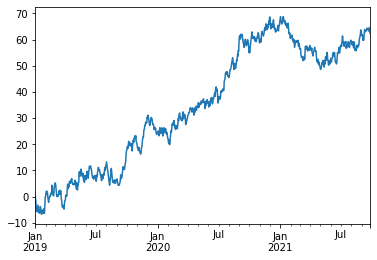

In [190]:
ts.plot()
plt.show()

In [200]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))

In [201]:
df = df.cumsum()

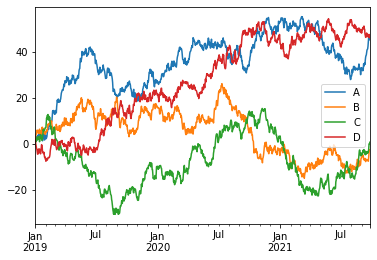

In [202]:
df.plot()
plt.legend(loc='best')
plt.show()